<a href="https://colab.research.google.com/github/BrendaGuadalupeVazquez/INVESTIGACI-N-DE-OPERACIONES/blob/main/TareaEquipo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**ANÁLISIS DE UNA EMPRESA MANUFACTURERA Y PLANIFICACIÓN DE RUTA CRÍTICA**


Orozco Cisneros Ximena Carolina

Vázquez Romero Brenda Guadalupe

---



Una planta de manufactura se dedica a la producción de componentes electrónicos utilizados en sistemas industriales, durante el último trimestre, la empresa presentó retrasos frecuentes en las entregas y una baja eficiencia en sus procesos internos, lo que ha comenzado a generar pérdidas tanto económicas como de confianza con sus clientes.

Parte de una estrategia de mejora operativa, se ha decidido implementar un nuevo plan de producción optimizado, el cual involucra una serie de tareas que deben llevarse a cabo en un orden lógico y coordinado. Dado que este tipo de proyectos suele presentar múltiples actividades interdependientes, se solicitó que se realizara un análisis estructurado del proyecto mediante técnicas de investigación de operaciones, con el fin de identificar la ruta crítica del proyecto, es decir, aquellas actividades que determinan la duración mínima total del mismo.

Para ello, se debe modelar este proyecto como una red de actividades utilizando herramientas de análisis de redes, en dicha red, cada nodo representa una actividad y las conexiones representan la relación de precedencia entre actividades.

En una reunión con los directores de la planta, se estableció que el nuevo esquema de producción debe estar implementado completamente en un máximo de 20 días, ya que en esa fecha se firmó un nuevo contrato con un cliente clave y se requiere iniciar entregas bajo el nuevo sistema. Sin embargo, al analizar el proyecto con base en los tiempos estimados por el equipo técnico, se identificó que la duración total del proyecto, si se lleva a cabo de manera natural sin intervención adicional, sería de 28 días.
Para lograr disminuir los 8 días adicionales que hay, debemos identificar actividades críticas donde no existe margen de retraso, acelerar algunas actividades críticas, evaluar si hay actividades no críticas que pueden reprogramarse para liberar recursos, considerar recursos adicionales o trabajo paralelo en ciertas tareas. Esto nos ayudará a determinar la ruta crítica del proyecto, calcular el tiempo total estimado de ejecución y comparar este tiempo con la fecha límite establecida.

Para poder realizar el análisis, primero presentamos una lista de actividades de lo que podría pasar en una planta real, algunas tareas son más administrativas o de preparación, otras ya tienen que ver directamente con la fabricación del producto, y otras están más al final, cuando ya se va a empacar y despachar todo.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from tabulate import tabulate

In [2]:
actividades = [
    ["A", "Recepción de materia prima","—",2],
    ["B", "Inspección de calidad de materiales","A",1],
    ["C", "Preparación de máquinas y herramientas","A",2],
    ["D", "Inicio de producción: ensamblaje inicial","B, C",3],
    ["E", "Montaje de componentes electrónicos","D",4],
    ["F", "Soldadura y conexiones","E",2],
    ["G", "Verificación funcional","F",2],
    ["H", "Ajustes y correcciones","G",1],
    ["I", "Empaque del producto","G, H",2],
    ["J", "Generación de documentación de envío","H",1],
    ["K", "Despacho y entrega al cliente","I, J",2],
]
print("\nActividades del Proyecto:")
print(tabulate(actividades,headers=["Código","Actividad","Predecesores","Duración\n(días)"],tablefmt="grid"))
total_duracion=sum(fila[3] for fila in actividades)
print("\nDuración total de actividades al inicio del análisis: ", total_duracion,"días")



Actividades del Proyecto:
+----------+------------------------------------------+----------------+------------+
| Código   | Actividad                                | Predecesores   |   Duración |
|          |                                          |                |     (días) |
+==========+==========================================+================+============+
| A        | Recepción de materia prima               | —              |          2 |
+----------+------------------------------------------+----------------+------------+
| B        | Inspección de calidad de materiales      | A              |          1 |
+----------+------------------------------------------+----------------+------------+
| C        | Preparación de máquinas y herramientas   | A              |          2 |
+----------+------------------------------------------+----------------+------------+
| D        | Inicio de producción: ensamblaje inicial | B, C           |          3 |
+----------+---------------

Una vez identificadas las actividades, sus predecesores y duraciones, se puede representar esta información para facilitar el cálculo de la ruta crítica.

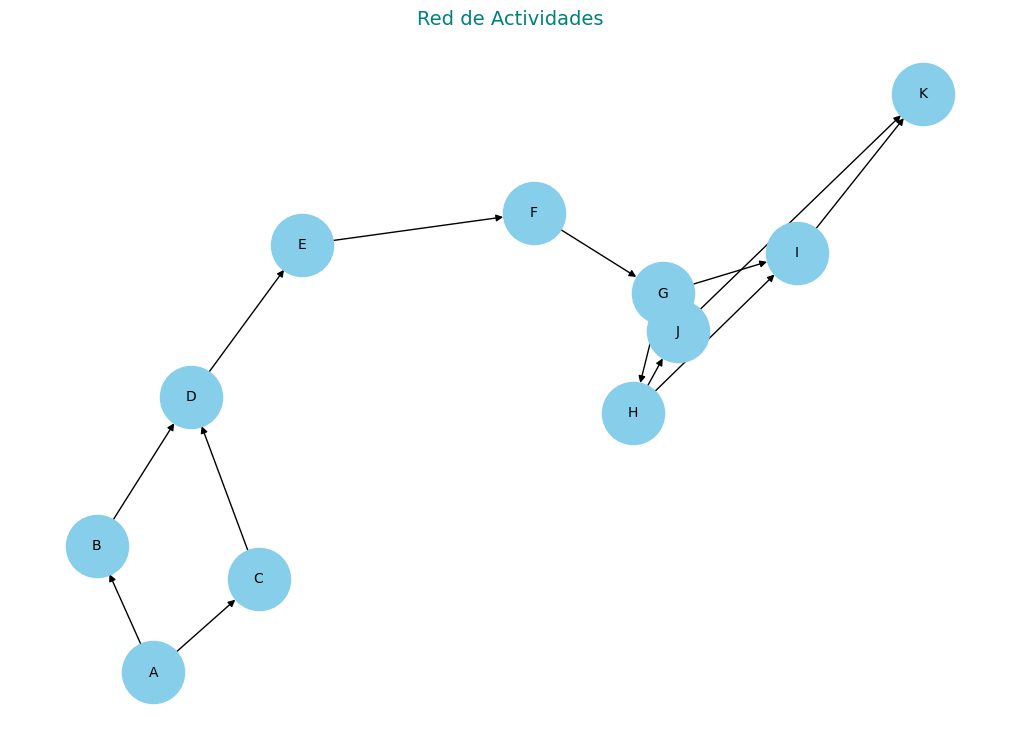

In [3]:
G=nx.DiGraph()
for c,n,p,d in actividades:
    G.add_node(c,dur=d)
for c,n,p,d in actividades:
    if p!="—":
        for x in p.split(","):
            G.add_edge(x.strip(),c)
pos=nx.spring_layout(G,seed=1)
plt.figure(figsize=(10,7))
nx.draw(G,pos,with_labels=True,node_color='skyblue',node_size=2000,font_size=10)
plt.title("Red de Actividades",fontsize=14,color='teal')
plt.show()


Ahora, procedemos a calcular la ruta crítica, identificando la secuencia de tareas que determinan la duración mínima total

In [4]:
for u,v in G.edges():
    G[u][v]['weight']=G.nodes[u]['dur']
et={}
for n in nx.topological_sort(G):
    a=list(G.predecessors(n))
    et[n]=max([et[x]+G.nodes[x]['dur'] for x in a]) if a else 0
lt={}
f=max(et,key=lambda x:et[x]+G.nodes[x]['dur'])
td=et[f]+G.nodes[f]['dur']
for n in reversed(list(nx.topological_sort(G))):
    s=list(G.successors(n))
    lt[n]=min([lt[x]-G.nodes[n]['dur'] for x in s]) if s else td-G.nodes[n]['dur']
rc=[n for n in G.nodes if et[n]==lt[n]]
print("Ruta crítica:",'->'.join(rc))
print("Duración total del proyecto:",td,"días")

Ruta crítica: A->C->D->E->F->G->H->I->K
Duración total del proyecto: 20 días


Finalmente, se representa gráficamente la ruta crítica, permitiendo visualizar las actividades que no admiten retraso sin afectar la duración total.

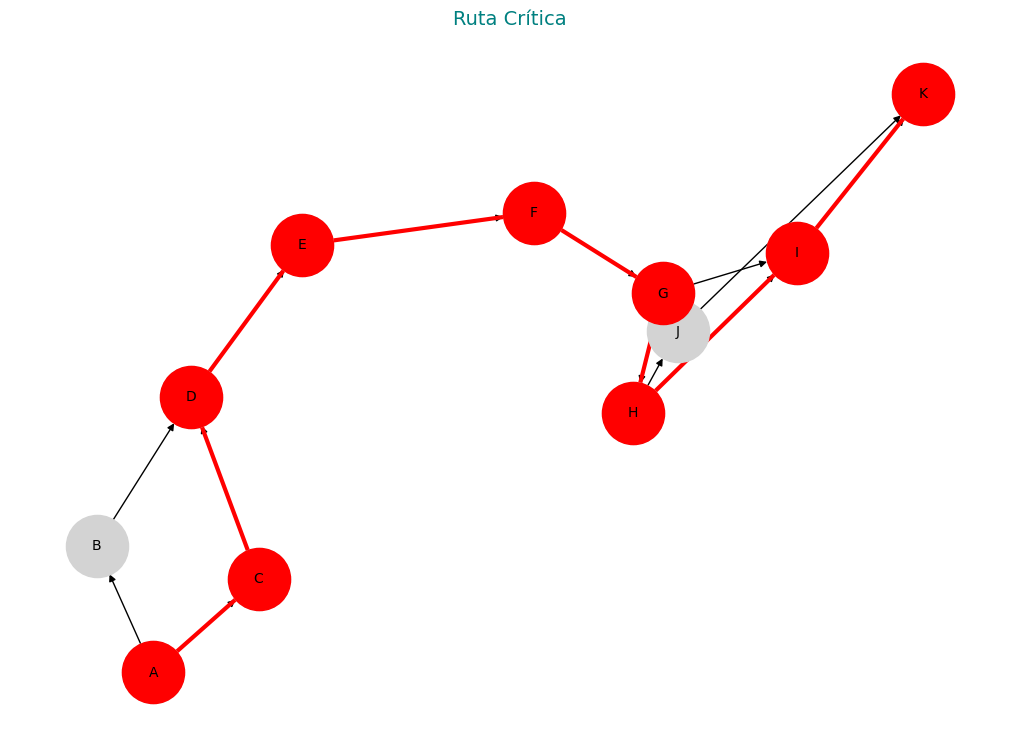

In [5]:
rc_e=[(rc[i],rc[i+1]) for i in range(len(rc)-1) if G.has_edge(rc[i],rc[i+1])]
plt.figure(figsize=(10,7))
nx.draw(G,pos,with_labels=True,node_color='lightgrey',node_size=2000,font_size=10)
nx.draw_networkx_nodes(G,pos,nodelist=rc,node_size=2000,node_color='red')
nx.draw_networkx_edges(G,pos,edgelist=rc_e,edge_color='red',width=3)
plt.title("Ruta Crítica",fontsize=14,color='teal')
plt.show()



---
#Conclusión

En este proyecto usamos la librería networkx para modelar la red de actividades de la empresa, gracias a esto pudimos calcular y representar la ruta crítica, lo que nos permitió identificar cuáles son las actividades clave que no admiten retraso, ya que de ellas depende el tiempo total de finalización.

La visualización nos ayudó a entender de manera más clara el orden y la dependencia entre las actividades, además de reconocer dónde están los puntos que podrían generar retrasos; con esta información es posible planear mejor los recursos y tomar decisiones para ajustar tiempos, de forma que el proyecto pueda cumplirse dentro del plazo requerido.